<a href="https://colab.research.google.com/github/ViniViniAntunes/Analise-descritiva-PNAD-2015_Parte-2/blob/master/Curso_de_Estat%C3%ADstica_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# CURSO DE ESTATÍSTICA - PARTE 2
***

# 1 CONHECENDO OS DADOS
***

## 1.1 Dataset do projeto
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### Observação
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [0]:
import pandas as pd

In [0]:
dados = pd.read_csv('dados.csv', sep = ',')

In [105]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# 2 DISTRIBUIÇÕES DE PROBABILIDADE
***

## Problema
***

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

## 2.1 Distribuição Binomial
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

### Experimento Binomial

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

### Média da distribuição binomial

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

### Desvio padrão da distribuição binomial

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [0]:
from scipy.special import comb

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

## Exemplo: Mega Sena

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [107]:
combinacoes = comb(60, 6)
combinacoes

50063860.0

In [108]:
probabilidade = 1 / combinacoes
print('A probabilidade de ganhar na Mega Sena com apenas um joso simples é de {:0.15}'.format(probabilidade))

A probabilidade de ganhar na Mega Sena com apenas um joso simples é de 1.99744885831816e-08


## Exemplo: Concurso para cientista de dados

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

### Qual o número de ensaios ($n$)?

In [109]:
n= 10
n

10

### Os ensaios são independentes?

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

### Somente dois resultados são possíveis em cada ensaio?

Sim. O candidato tem duas possibilidades, ACERTAR ou ERRAR uma questão. 

### Qual a probabilidade de sucesso ($p$)?

In [110]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

### Qual a probabilidade de fracasso ($q$)?

In [111]:
q = 1 - p
q

0.6666666666666667

### Qual o total de eventos que se deseja obter sucesso ($k$)?

In [112]:
k = 5
k

5

### Solução 1

In [113]:
probabilidade = comb(n, k) * (p ** k) * (q ** (n - k))
print('A probabilidade do candidato acertar 5 questões é de {:0.8}'.format(probabilidade))

A probabilidade do candidato acertar 5 questões é de 0.13656455


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [0]:
from scipy.stats import binom

### Solução 2

In [115]:
probabilidade = binom.pmf(k, n, p)
print('A probabilidade do candidato acertar 5 questões é de {:0.8}'.format(probabilidade))

A probabilidade do candidato acertar 5 questões é de 0.13656455


### Obter a probabilidade do candidato passar

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [116]:
probabilidade_de_passar = binom.pmf(k, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)
print('A probabilidade do candidato passar é de {:0.8}'.format(probabilidade_de_passar))

A probabilidade do candidato passar é de 0.21312808


In [117]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

0.2131280800690952

In [118]:
1 - binom.cdf(4, n, p)

0.21312808006909512

In [119]:
binom.sf(4, n, p)

0.21312808006909517

## Exemplo: Gincana

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

### Solução

In [120]:
p = 0.6
p

0.6

In [121]:
n= 12
n

12

In [122]:
k = 8
k

8

In [123]:
probabilidade_de_equpe_com_mulheres = binom.pmf(k, n, p)
print('A probabilidade de forma uma equipe com oito mulheres é de {:0.8}'.format(probabilidade_de_equpe_com_mulheres))

A probabilidade de forma uma equipe com oito mulheres é de 0.21284094


In [124]:
equipes = 30 * probabilidade_de_equpe_com_mulheres
print('O número de equipes formadas com oito mulheres é de {}'.format(int(equipes)))

O número de equipes formadas com oito mulheres é de 6


---
---

## Problema
***

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

## 2.2 Distribuição Poisson
***

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico.

Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos. ***Ou seja, conseguimos contabilizar os sucessos, mas não conseguimos contabilizar os fracassos.***

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos:

*   a determinação do número de clientes que entram em uma loja em determinada hora ***(conseguimos contabilizar o número de pessoas que entram em uma loja, mas não conseguimos contabilizar os número de pessoas que NÃO ENTRAM)***
*   o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço ***(conseguimos contabilizar o número de carros que chegam em um drive-thru, mas não conseguimos contabilizar os número de carros que NÃO CHEGAM)***
*   a determinação do número de acidentes registrados em um trecho de estrada ***(conseguimos contabilizar o número de acidentes registrados em um trecho de estrada, mas não conseguimos contabilizar os número acidentes NÃO REGISTRADOS)***
*   Etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

### Média da distribuição Poisson

# $$\mu$$

### Desvio padrão da distribuição Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [0]:
import numpy as np

In [126]:
np.e

2.718281828459045

## Exemplo: Delivery

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

### Qual o número médio de ocorrências por hora ($\mu$)?

In [127]:
media = 20
media

20

### Qual o número de ocorrências que queremos obter no período ($k$)?

In [128]:
k = 15
k

15

### Solução 1

In [129]:
probabilidade = ((np.e ** (-media)) * (media ** k)) / (np.math.factorial(k))
print('A probabilidade de,\nem determinada hora do dia,\n'
      'o restaurante receber 15 pedidos é de {:.2f}%'.format(probabilidade * 100))

A probabilidade de,
em determinada hora do dia,
o restaurante receber 15 pedidos é de 5.16%


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solução 2

In [130]:
from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('A probabilidade de,\nem determinada hora do dia,\n'
      'o restaurante receber 15 pedidos é de {:.2f}%'.format(probabilidade * 100))

A probabilidade de,
em determinada hora do dia,
o restaurante receber 15 pedidos é de 5.16%


---
---

## Problema
***

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

## 2.3 Distribuição Normal
***

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. ***Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão***;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

### Construindo tabela normal padronizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [131]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [], 
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

## Exemplo: Qual sua altura?

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

### Obter a variável padronizada $Z$

In [132]:
media = 1.7
media

1.7

In [133]:
desvio_padrao = 0.1
desvio_padrao

0.1

In [134]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

### Solução 1 - Utilizando tabela

In [135]:
# Esse valor é retirado da tabela lá de cima.
# Para achá-lo, basta procurar o valor de Z, onde...
# Z = (valor da linha) + (linha com a coluna)
probabilidade = 0.8413
probabilidade

0.8413

### Solução 2 - Utilizando Scipy

In [136]:
from scipy.stats import norm
norm.cdf(Z)

0.8413447460685431

In [137]:
# Ou, em função da variável original...
norm.cdf((1.8 - media) / desvio_padrao)

0.8413447460685431

### Problema B - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

### Obter a variável padronizada $Z$

In [138]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [139]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

### Solução 1 - Utilizando tabela

In [140]:
# Pega Z da tabela e subrai a metade e depois multiplica por 2
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

### Solução 2 - Utilizando Scipy

In [141]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

0.6826894921370863

In [142]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370857

### Exercício 1:
O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com ***média*** 300,00 reais e ***desvio padrão*** igual a 50,00 reais. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

a) Entre 250,00 reais e 350,00 reais

b) Entre 400,00 reais e 500,00 reais

###a)

In [143]:
media = 300
desvio_padrao = 50
Z_superior = (350 - media) / desvio_padrao
Z_inferior = (250 - media) / desvio_padrao
Z_inferior, Z_superior

(-1.0, 1.0)

In [144]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370859

###b)

In [145]:
media = 300
desvio_padrao = 50
Z_superior = (500 - media) / desvio_padrao
Z_inferior = (400 - media) / desvio_padrao
Z_inferior, Z_superior

(2.0, 4.0)

In [146]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.02271846070634609

### Problema C - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

### Obter a variável padronizada $Z$

In [147]:
desvio_padrao = 0.1
Z = (1.9 - media) / desvio_padrao
Z

-2981.0

### Solução 1 - Utilizando tabela

In [148]:
# Da tabela, temos que:
probabilidade = 1 - 0.9772
probabilidade

0.022800000000000042

### Solução 2 - Utilizando Scipy

In [149]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

1.0

In [150]:
probabilidade = norm.cdf(-Z)
probabilidade

1.0

###Exercício 2:

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

a) Entre 650 e 750 dias

b) Mais que 800 dias

c) Menos que 700 dias

###a)

In [151]:
media = 720
desvio_padrao = 30

Z_superior = (750 - media) / desvio_padrao
Z_inferior = (650 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 83.15%


###b)

In [152]:
media = 720
desvio_padrao = 30

Z = (800 - media) / desvio_padrao

probabilidade = 1 - norm.cdf(Z)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 0.38%


###c)

In [153]:
media = 720
desvio_padrao = 30

Z = (700 - media) / desvio_padrao

probabilidade = norm.cdf(Z)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 25.25%


###Exercício 3:

Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

a) Z < 1,96

b) Z > 2,15

c) Z < -0,80

d) Z > 0,59

###a)

In [154]:
probabilidade = norm.cdf(1.96)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 97.50%


###b)

In [155]:
probabilidade = 1 - norm.cdf(2.15)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 1.58%


###c)

In [156]:
probabilidade = norm.cdf(-0.80)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 21.19%


###d)

In [157]:
probabilidade = 1 - norm.cdf(0.59)
print("A probabilidade de uma lâmpada, escolhida ao acaso,\n"
"durar entre 650 e 750 dias é dé {:.2f}%".format(probabilidade * 100))

A probabilidade de uma lâmpada, escolhida ao acaso,
durar entre 650 e 750 dias é dé 27.76%


### Exercício 4:

Antes de lançar um novo carro no mercado as montadoras fazem testes com alguns protótipos, cujo objetivo é alcançar a melhor performance possível, dentro da sua categoria. Em testes com seu novo carro RBX em uma superfície seca, a distância de frenagem média foi 145 pés e o desvio padrão 6,53 pés. As distâncias de frenagem do carro são normalmente distribuídas. Qual é a maior distância de frenagem em uma superfície seca que um desses RBX poderia ter e ainda estar no 1,5% do topo?

In [0]:
media = 145
desvio_padrão = 6.53

####Resp:

In [159]:
distância_superior = media * (1 + 1.5 / 100)
print("A maior distância de frenagem em uma superfície seca\n"
      "que um desses RBX poderia ter e ainda estar no 1,5% do topo é:\n"
      "{:.2f} pés.".format(distância_superior))


A maior distância de frenagem em uma superfície seca
que um desses RBX poderia ter e ainda estar no 1,5% do topo é:
147.17 pés.


#### E qual é a probabilidade de, escolhendo um dos carro ao acaso, ele for um desses da condição anterior?

In [160]:
distância_inferior = media * (1 - 1.5 / 100)

Z_superior = (distância_superior - media) / desvio_padrao
Z_inferior = (distância_inferior - media) / desvio_padrao

probabilidade = (norm.cdf(Z_superior) - norm.cdf(Z_inferior))

print("A probabilidade de, escolhendo um dos carro ao acaso,\n"
      "ele for um desses da condição anterior é:\n"
      "{:.2f}%.".format(probabilidade * 100))

A probabilidade de, escolhendo um dos carro ao acaso,
ele for um desses da condição anterior é:
5.78%.


#3 AMOSTRAGEM
***

## 3.1 População e Amostra
***

### População
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas).

### Populações finitas

Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.

### Populações infinitas

Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

***Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.***

### Amostra
Subconjunto representativo da população.

Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras.

## 3.2 Quando utilizar uma amostra?
***

### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

### Custos elevados

Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

## 3.3 Amostragem Aleatória Simples
***

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que ***cada elemeto da população tenha as mesmas chances de ser selecionado para fazer parte da amostra***.

In [161]:
dados.shape[0]

76840

In [162]:
dados.Renda.mean()

2000.3831988547631

In [0]:
amostra = dados.sample(n = 1000, random_state = 101)
# Mas como garantir que essa amostra é representativa da população..?

In [164]:
amostra.shape[0]

1000

In [165]:
amostra.Renda.mean()

1998.783

In [166]:
dados.Sexo.value_counts(normalize = True) * 100

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [167]:
amostra.Sexo.value_counts(normalize = True) * 100

0    70.6
1    29.4
Name: Sexo, dtype: float64

## 3.4 Amostragem Estratificada
***

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

## 3.5 Amostragem por Conglomerados
***

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

# 4 ESTIMAÇÃO
***

## Problema

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## 4.1 Teorema do limite central
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

### Entendendo o Teorema do Limite Central

In [0]:
n = 2000
total_de_amostra = 1500

In [169]:
amostras = pd.DataFrame()
amostras

""


In [170]:
for i in range(total_de_amostra):
  _ = dados.Idade.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' +str(i)] = _
amostras


,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,Amostra_10,Amostra_11,Amostra_12,Amostra_13,Amostra_14,Amostra_15,Amostra_16,Amostra_17,Amostra_18,Amostra_19,Amostra_20,Amostra_21,Amostra_22,Amostra_23,Amostra_24,Amostra_25,Amostra_26,Amostra_27,Amostra_28,Amostra_29,Amostra_30,Amostra_31,Amostra_32,Amostra_33,Amostra_34,Amostra_35,Amostra_36,Amostra_37,Amostra_38,Amostra_39,...,Amostra_1460,Amostra_1461,Amostra_1462,Amostra_1463,Amostra_1464,Amostra_1465,Amostra_1466,Amostra_1467,Amostra_1468,Amostra_1469,Amostra_1470,Amostra_1471,Amostra_1472,Amostra_1473,Amostra_1474,Amostra_1475,Amostra_1476,Amostra_1477,Amostra_1478,Amostra_1479,Amostra_1480,Amostra_1481,Amostra_1482,Amostra_1483,Amostra_1484,Amostra_1485,Amostra_1486,Amostra_1487,Amostra_1488,Amostra_1489,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,52,48,52,62,39,48,38,27,25,67,29,46,28,27,39,46,79,54,59,36,21,47,45,52,56,54,31,75,28,52,46,61,65,70,31,34,31,28,53,66,...,67,59,36,55,59,27,51,35,26,26,52,39,37,42,49,36,53,36,38,43,34,39,48,43,26,27,31,24,42,35,45,50,57,77,85,42,37,60,49,38
1,55,46,49,44,35,33,44,30,50,25,59,25,57,75,64,32,36,60,36,30,30,65,28,47,26,49,33,54,45,40,26,54,59,56,52,48,42,54,33,47,...,39,39,34,56,32,42,49,45,30,59,41,47,23,60,30,42,44,29,23,39,43,40,40,52,51,48,33,65,39,20,62,46,42,34,28,45,53,51,42,30
2,48,59,46,61,42,46,39,38,53,56,65,28,45,22,60,36,49,53,27,40,51,53,43,28,57,36,37,25,46,29,34,55,34,46,39,64,42,60,28,34,...,37,51,47,32,55,32,45,37,37,31,38,41,29,30,26,38,44,30,82,30,35,48,42,50,32,35,31,47,58,35,50,45,69,59,35,47,45,42,33,51
3,35,47,57,47,27,57,40,47,65,30,60,49,31,46,22,45,45,44,41,55,47,59,46,45,41,31,55,48,51,35,39,38,28,57,42,77,52,78,62,49,...,52,39,30,38,41,70,29,50,35,75,49,48,40,49,33,34,54,50,38,46,58,35,29,52,40,41,42,51,56,61,47,36,50,59,62,54,33,48,53,27
4,45,50,61,43,32,54,69,75,38,40,46,53,58,46,28,54,48,28,51,49,33,39,34,63,49,42,31,34,20,27,31,32,52,51,39,46,51,42,22,39,...,27,20,50,76,59,28,31,44,41,48,46,61,65,35,19,60,30,42,38,55,47,60,32,23,53,39,57,53,57,52,45,68,56,37,35,54,55,28,52,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,24,43,57,41,59,35,36,57,49,44,43,35,39,26,58,40,30,43,59,50,48,30,31,21,53,46,61,20,58,57,53,45,28,34,25,33,47,26,31,52,...,38,27,36,25,55,55,46,33,35,60,40,46,36,58,47,38,44,49,58,45,28,29,37,33,35,39,29,31,55,54,69,42,48,35,65,45,63,17,57,77
1996,33,40,48,52,52,60,35,53,38,49,56,51,30,41,40,40,53,46,50,46,41,54,26,24,34,43,61,53,35,52,57,42,22,27,30,32,50,55,73,38,...,42,24,30,48,28,34,34,50,50,67,49,49,48,42,34,33,42,45,42,51,33,34,42,31,58,40,35,24,83,27,83,53,29,21,50,34,56,42,52,33
1997,70,42,52,29,50,41,54,36,34,39,32,55,66,39,38,20,44,67,49,39,25,45,60,37,28,51,41,53,34,43,48,37,25,51,44,46,37,44,48,71,...,46,44,25,53,38,69,60,57,39,30,63,41,47,47,35,26,41,36,69,63,42,45,74,57,65,35,28,41,34,39,52,60,40,26,52,66,33,37,41,49
1998,60,54,28,52,31,53,57,39,51,35,54,52,50,26,47,55,64,48,31,26,24,42,71,38,24,37,35,44,41,46,53,39,30,40,50,53,39,28,44,57,...,48,39,23,34,39,59,26,48,64,37,31,45,30,50,35,23,49,47,47,49,43,45,19,37,48,23,44,44,55,28,49,29,51,57,36,72,41,40,38,44


> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [171]:
amostras.mean()

Amostra_0       43.7145
Amostra_1       44.4515
Amostra_2       43.5230
Amostra_3       44.2415
Amostra_4       44.3930
                 ...   
Amostra_1495    44.0200
Amostra_1496    43.8745
Amostra_1497    43.8090
Amostra_1498    44.1135
Amostra_1499    44.1420
Length: 1500, dtype: float64

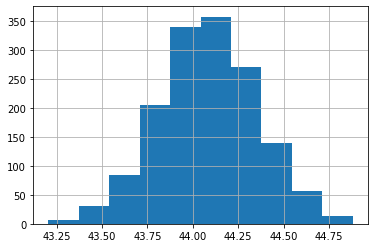

In [172]:
amostras.mean().hist()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [173]:
dados.Idade.mean()

44.07142113482561

In [174]:
amostras.mean().mean()

44.08225999999989

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [175]:
amostras.mean().std()

0.26982787808006964

In [176]:
dados.Idade.std()

12.480583465360187

In [177]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

## 4.2 Níveis de confiança e significância
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## 4.3 Erro inferencial
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## 4.4 Intervalos de confiança
***

### Intevalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## Exemplo:

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

### Média amostral

In [178]:
media_amostra = 5050
media_amostra

5050

### Nível de significância ($\alpha$)

In [179]:
significancia = 0.05
significancia

0.05

### Nível de confiança ($1 - \alpha$)

In [180]:
confianca = 1 - significancia
confianca

0.95

### Obtendo $z$
Primeiro, olha na tabela e procurar os 95% / 5

In [181]:
tabela_normal_padronizada[16: 26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [182]:
0.95 / 2

0.475

In [183]:
0.5 + (0.95 / 2)

0.975

In [184]:
1.9 + 0.06

1.96

In [185]:
z = norm.ppf(0.975)
z

1.959963984540054

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_\bar{x}$

In [186]:
desvio_padrao = 150
desvio_padrao

150

In [187]:
n= 20
n

20

In [188]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [189]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

### Obtendo $e$

In [190]:
e = z * sigma
e

65.73919054324361

### Solução 1 - Calculando o intervalo de confiança para a média

In [191]:
intervalo = (
    media_amostra - e,
    media_amostra + e
)
intervalo

(4984.260809456757, 5115.739190543243)


### Solução 2 - Calculando o intervalo de confiança para a média

In [192]:
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

###Exercícios:

1)

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.

In [193]:
z = norm.ppf(0.975)
desvio_padrao = 6
n = 50

e = z * (desvio_padrao / np.sqrt(n))
print("R$ {0:0.2f}".format(e))

R$ 1.66


###Exercicios

2) Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [194]:
desvio_padrao = 11
n = 1976
raiz_de_n = np.sqrt(n)
media_amostra = 28
sigma = desvio_padrao / raiz_de_n

norm.interval(alpha = 0.90, loc = media_amostra, scale = sigma)

(27.592969951356466, 28.407030048643534)

# 5 CÁLCULO DO TAMANHO DA AMOSTRA
(para que a nossa amostra seja realmente representativa para a população que estamos estudando)
***

##Problema

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

##5.1 Variáveis quantitativas e população infinita
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### Observações

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

## Exemplo: Rendimento médio

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

### Obtendo $z$

In [195]:
0.95 / 2

0.475

In [196]:
0.5 + 0.95 / 2

0.975

In [197]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma$

In [198]:
sigma = 3323.39
sigma

3323.39

### Obtendo $e$

In [199]:
e = 100
e

100

### Obtendo $n$

In [200]:
n = ((z * sigma) / e) ** 2
int(n.round())

4243

###Exercício:

O valor do gasto médio dos clientes de uma loja de conveniência é de R$ 45,50. Assumindo que o desvio padrão dos gastos é igual a 15,00 reais, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

###Obtendo do dados do exercício


In [0]:
media = 45.5
sigma = 15
significancia = 0.10
confianca = 1 - significancia

### Obtendo $z$

In [202]:
z = norm.ppf(0.5 + (confianca / 2))
z

1.6448536269514722

### Obtendo o erro $e$

In [203]:
erro_percentual = 0.10
e = media * erro_percentual
e

4.55

### Obtendo o tamanho da amostra $n$

In [204]:
n = (z * (sigma / e)) ** 2
int(n.round())

29

---
---

## Problema

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

## 5.2 Variáveis quantitativas e população finita
***

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## Exemplo: Indústria de refrigerantes

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [205]:
N = 10000
N

10000

### Obtendo $z$

In [206]:
z = norm.ppf(0.5 + 0.95 / 2)
z

1.959963984540054

### Obtendo $s$

In [207]:
s = 12
s

12

### Obtendo $e$

In [208]:
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [211]:
n = ((z**2) * (s**2) * N) / ((z**2) * (s**2) + ((e**2) * (N - 1)))
int(n.round())

22

### Exercício:

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

### Obtendo $N$

In [212]:
N = 2000
N

2000

### Obtendo $z$

In [213]:
z = norm.ppf(0.5 + 0.95 / 2)
z

1.959963984540054

### Obtendo $s$

In [215]:
s = 480
s

480

### Obtendo $e$

In [216]:
e = 0.3 * 1000
e

300.0

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [218]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

10

# 6 FIXANDO O CONTEÚDO
***

##Exemplo: Rendimento médio

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Construindo o dataset conforme especificado pelo problema

In [0]:
renda_5000 = dados.query('Renda <= 5000').Renda

In [220]:
sigma = renda_5000.std()
sigma

1082.794549030635

In [221]:
media = renda_5000.mean()
media

1426.5372144947232

In [224]:
z = norm.ppf(0.5 + 0.95 / 2)
z

1.959963984540054

In [225]:
e = 10
e

10

### Calculando o tamanho da amostra (dizemos que é infinita pois é muito grande)

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

In [228]:
n = (z * (sigma / e))**2
n = int(n.round())
n

45039

### Calculando o intervalo de confiança para a média

In [0]:
intervalo = 

### Realizando uma prova gráfica

In [0]:
intervalo = norm.interval(alpha = 0.95, loc = media, scale = sigma / np.sqrt(n))

In [232]:
intervalo

(1416.5372195108241, 1436.5372094786223)

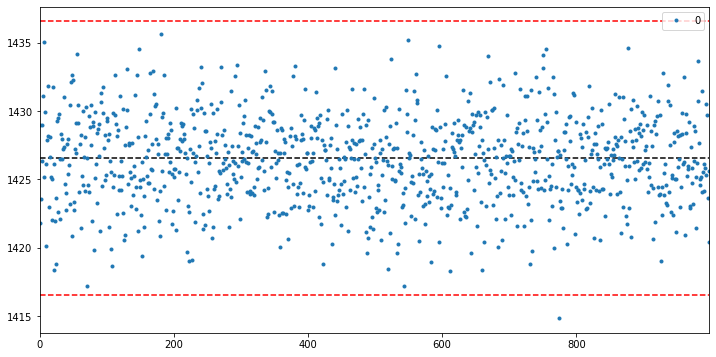

In [239]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors = 'black', linestyles = 'dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors = 'red', linestyles = 'dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors = 'red', linestyles = 'dashed')
ax